In [2]:
import pandas
df = pandas.read_csv('Data/customer_churn.csv',index_col =0,header = 0)
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


## 数据预处理

In [3]:
df = df.ix[:,3:]
cat_var = ['international_plan','voice_mail_plan','churn']
for var in cat_var:
    df[var] = df[var].map(lambda e: 1 if e == 'yes' else 0)
y = df.ix[:,-1]
x = df.ix[:,:-1]

D:\Anaconda3.6.5fille\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
D:\Anaconda3.6.5fille\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
D:\Anaconda3.6.5fille\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [4]:
df.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
2,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
3,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
4,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
5,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


## 区分训练与测试数据集

In [5]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size =0.33,random_state = 123)

In [7]:
train_x.shape
test_x.shape

(1100, 16)

## 使用决策树建立分类模型


In [9]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [11]:
predicted = clf.predict(test_x)
predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [12]:
import numpy
numpy.sum(test_y == predicted) /len(test_y)

0.8936363636363637

## 产生Confusion Matrix以及其他评估指标

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y,predicted)

0.8936363636363637

In [14]:
from sklearn.metrics import confusion_matrix
m = confusion_matrix(test_y,predicted)
m

array([[924,  26],
       [ 91,  59]], dtype=int64)

In [15]:
from sklearn.metrics import classification_report
print(classification_report(test_y,predicted))

             precision    recall  f1-score   support

          0       0.91      0.97      0.94       950
          1       0.69      0.39      0.50       150

avg / total       0.88      0.89      0.88      1100



## 使用 ROC Curve 比较模型

In [16]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf1.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [19]:
from sklearn.svm import SVC
clf2 = SVC(probability = True,kernel = 'linear',cache_size = 7000,max_iter = 10000)
clf2.fit(train_x,train_y)

D:\Anaconda3.6.5fille\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, cache_size=7000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=10000, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
from sklearn.linear_model import LogisticRegression
clf3 = LogisticRegression()
clf3.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
from sklearn.ensemble import RandomForestClassifier
clf4 = RandomForestClassifier()
clf4.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

D:\Anaconda3.6.5fille\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


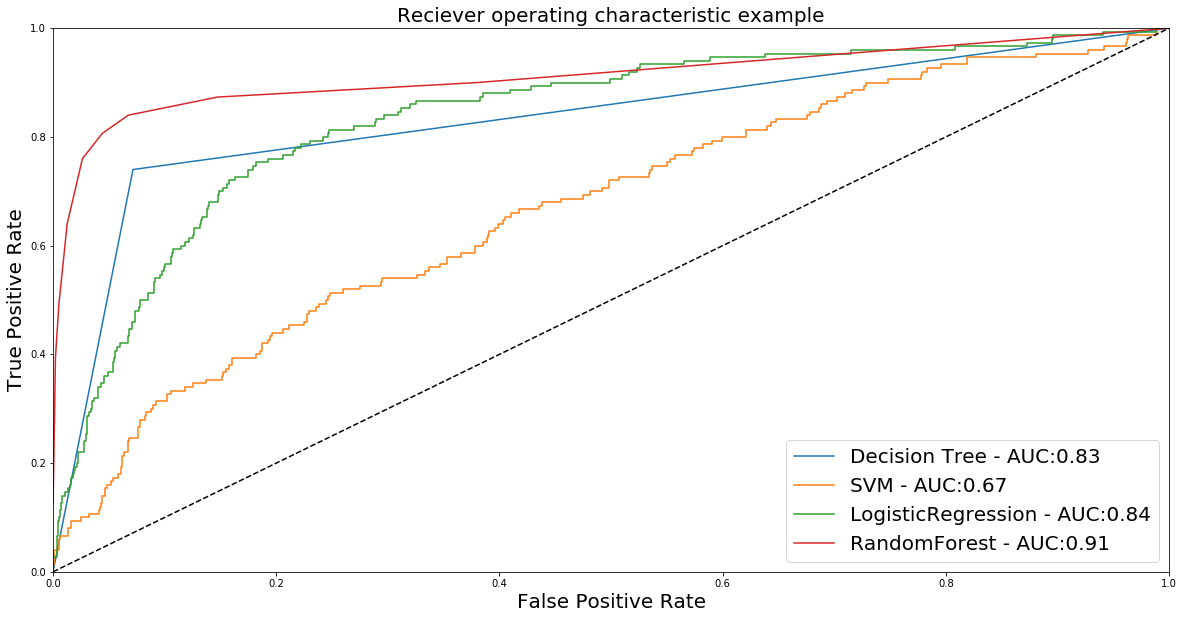

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
plt.figure(figsize = [20,10])
for clf,title in zip([clf1,clf2,clf3,clf4],['Decision Tree','SVM','LogisticRegression','RandomForest']):
    probas_ = clf.fit(train_x,train_y).predict_proba(test_x)
    fpr,tpr,thresholds = roc_curve(test_y,probas_[:,1])
    plt.plot(fpr,tpr,label='%s - AUC:%.2f' %(title,auc(fpr, tpr)) )
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate',fontsize = 20)
plt.ylabel('True Positive Rate',fontsize = 20)
plt.title('Reciever operating characteristic example',fontsize = 20)
plt.legend(loc = 'lower right',fontsize = 20)
plt.show()

## 返回的是排序好后每个指定元素的下标

In [32]:
# train_x.columns
# clf1.feature_importances_.argsort()[::-1]
train_x.columns[clf4.feature_importances_.argsort()[::-1]]

Index(['total_day_minutes', 'total_day_charge',
       'number_customer_service_calls', 'total_eve_minutes',
       'international_plan', 'total_eve_charge', 'total_intl_charge',
       'total_intl_calls', 'total_day_calls', 'number_vmail_messages',
       'total_night_minutes', 'total_night_charge', 'total_night_calls',
       'total_intl_minutes', 'total_eve_calls', 'voice_mail_plan'],
      dtype='object')

## 评估特征重要性

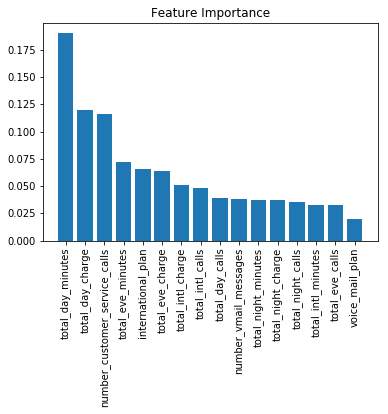

In [33]:
import matplotlib.pyplot as plt
importance = clf4.feature_importances_
names = train_x.columns
plt.title('Feature Importance')
plt.bar(range(0,len(names)),importance[importance.argsort()[::-1]])
plt.xticks(range(0,len(names)),names[importance.argsort()[::-1]],rotation = 90)
plt.show()